In [ ]:
Champignon
Donné le 02/08/2007 dataset

Étape 1 : Importer les packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


Étape 2 : Charger le dataset Mushroom depuis ucimlrepo python Copier Modifier


In [2]:
#LIEN: https://archive.ics.uci.edu/dataset/73/mushroom
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
mushroom = fetch_ucirepo(id=73) 
  
# data (as pandas dataframes) 
X = mushroom.data.features 
y = mushroom.data.targets 
  
# metadata 
print(mushroom.metadata) 
  
# variable information 
print(mushroom.variables) 


{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely po

Étape 3 : Analyse des données

In [5]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Charger le dataset
mushroom = fetch_ucirepo(id=73)

# Créer les DataFrames
X_raw = pd.DataFrame(mushroom.data.features)
y_raw = pd.Series(mushroom.data.targets.values.ravel(), name="class")

# Ajouter les noms de colonnes manuellement
X_raw.columns = [
    'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
    'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
    'ring-type', 'spore-print-color', 'population', 'habitat'
]

Étape 4 : Prétraitement des données

In [8]:
# Choix de la cible multiclasse : "odor"
y_multiclass = X_raw['odor']

# On retire cette colonne de X pour éviter fuite de données
X_multi = X_raw.drop(columns=['odor'])

# Encodage
le_multi = LabelEncoder()
y_multi = le_multi.fit_transform(y_multiclass)


In [9]:
X = X_raw.copy()
y_binary = LabelEncoder().fit_transform(y_raw)

In [10]:
y_multiclass = X_raw['odor']
X_multi = X_raw.drop(columns=['odor'])

y_multi = LabelEncoder().fit_transform(y_multiclass)


 Étape 5 : Diviser les données : Train / Test

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Choix de la colonne cible multiclasse
y_multiclass = X_raw['odor']
X_multi = X_raw.drop(columns=['odor'])

# Encodage
X_multi_encoded = X_multi.apply(LabelEncoder().fit_transform)
y_multi = LabelEncoder().fit_transform(y_multiclass)

# Split train/test
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_multi_encoded, y_multi, test_size=0.2, random_state=42)



 Étape 6 : Construire les 5 algorithmes classiques + Shallow Neural Network

In [22]:
models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

for name, model in models.items():
    model.fit(X_train_m, y_train_m)
    y_pred = model.predict(X_test_m)
    acc = accuracy_score(y_test_m, y_pred)
    mse = mean_squared_error(y_test_m, y_pred)
    print(f"{name} -> Accuracy: {acc:.4f} | MSE: {mse:.4f}")

KNN -> Accuracy: 0.7458 | MSE: 4.8732
Decision Tree -> Accuracy: 0.7022 | MSE: 6.1231
SVM -> Accuracy: 0.7858 | MSE: 4.1742
Logistic Regression -> Accuracy: 0.7797 | MSE: 3.7729


C:\Users\DANH\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# Encodage des features
X_encoded = X_raw.apply(LabelEncoder().fit_transform)
# Encodage de la cible binaire (class : edible/poisonous)
y_binary = LabelEncoder().fit_transform(y_raw)
# Split Train/Test
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
    X_encoded, y_binary, test_size=0.2, random_state=42)

Étape 7 : Visualiser l’évolution de l’entraînement

Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 1.0000 - loss: 0.0056 - val_accuracy: 1.0000 - val_loss: 0.0055
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0055 - val_accuracy: 1.0000 - val_loss: 0.0051
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0044 - val_accuracy: 1.0000 - val_loss: 0.0061
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 0.0059 - val_accuracy: 1.0000 - val_loss: 0.0051
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0047 - val_accuracy: 1.0000 - val_loss: 0.0069
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0042 - val_accuracy: 1.0000 - val_loss: 0.0053
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 1.0000 - loss: 0.0049 - val_accuracy: 1.0000 - val_loss: 0.0048
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 0.9969 - val_lo

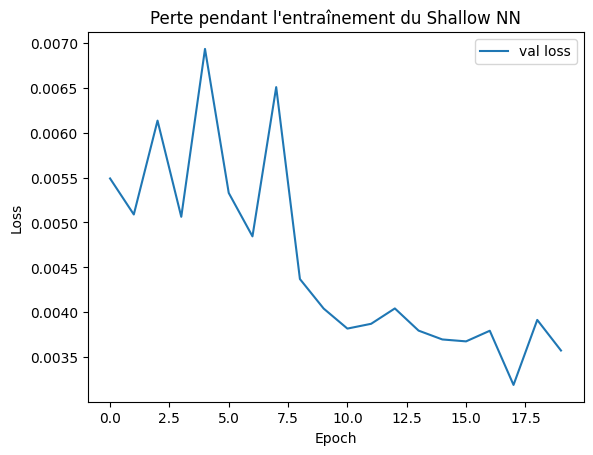

In [29]:
history = model_nn.fit(X_test_b, y_test_b, epochs=20, batch_size=32, validation_split=0.2)
plt.plot(history.history['val_loss'], label='val loss')
plt.title("Perte pendant l'entraînement du Shallow NN")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

Étape 8 : Évaluer le modèle

In [30]:
y_pred_nn = (model_nn.predict(X_test_b) > 0.5).astype("int32")
acc_nn = accuracy_score(y_test_b, y_pred_nn)
mse_nn = mean_squared_error(y_test_b, y_pred_nn)

print(f"Shallow NN -> Accuracy: {acc_nn:.4f} | MSE: {mse_nn:.4f}")


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Shallow NN -> Accuracy: 1.0000 | MSE: 0.0000
